# Loan Approval Analysis

## Objective

1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

## Data Description:

Variable Description

- Loan_ID Unique Loan ID
- Gender Male/ Female
- Married Applicant married (Y/N)
- Dependents Number of dependents
- Education Applicant Education (Graduate/ Under Graduate)
- Self_Employed Self employed (Y/N)
- ApplicantIncome Applicant income
- CoapplicantIncome Coapplicant income
- LoanAmount Loan amount in thousands
- Loan_Amount_Term Term of loan in months
- Credit_History credit history meets guidelines
- Property_Area Urban/ Semi Urban/ Rural
- Loan_Status (Target) Loan approved (Y/N)

### 1. Import required libraries and read the dataset.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
# loading the dataset
df = pd.read_csv('loan_approval_data.csv')

In [7]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and different features.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [9]:
df.shape

(614, 13)

In [10]:
df.nunique()

loan_id              614
gender                 2
married                2
dependents             4
education              2
self_employed          2
applicantincome      505
coapplicantincome    287
loanamount           203
loan_amount_term      10
credit_history         2
property_area          3
loan_status            2
dtype: int64

In [11]:
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.describe(include='O')

,loan_id,gender,married,education,self_employed,property_area,loan_status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,lp001002,male,yes,graduate,no,semiurban,y
freq,1,489,398,480,500,233,422


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [13]:
# checking for missing values
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [14]:
## Imputing the missing values of numerical columns using median imputation technique.
df['dependents'] = df['dependents'].fillna(df['dependents'].median())
df['loanamount'] = df['loanamount'].fillna(df['loanamount'].median())

## Imputing the missing values of numerical column mean imputation technique.
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].mean())
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].mean())

In [15]:
## Imputing the missing values of categorical columns using mode imputation technique.
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['married'] = df['married'].fillna(df['married'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [16]:
df.isnull().sum()  # checking if null value still exist after data cleaning

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [17]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [18]:
# checking for duplicate values
len(df[df.duplicated()])

0

In [19]:
# dropping duplicate values
df.drop('loan_id', axis=1, inplace=True)

In [21]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

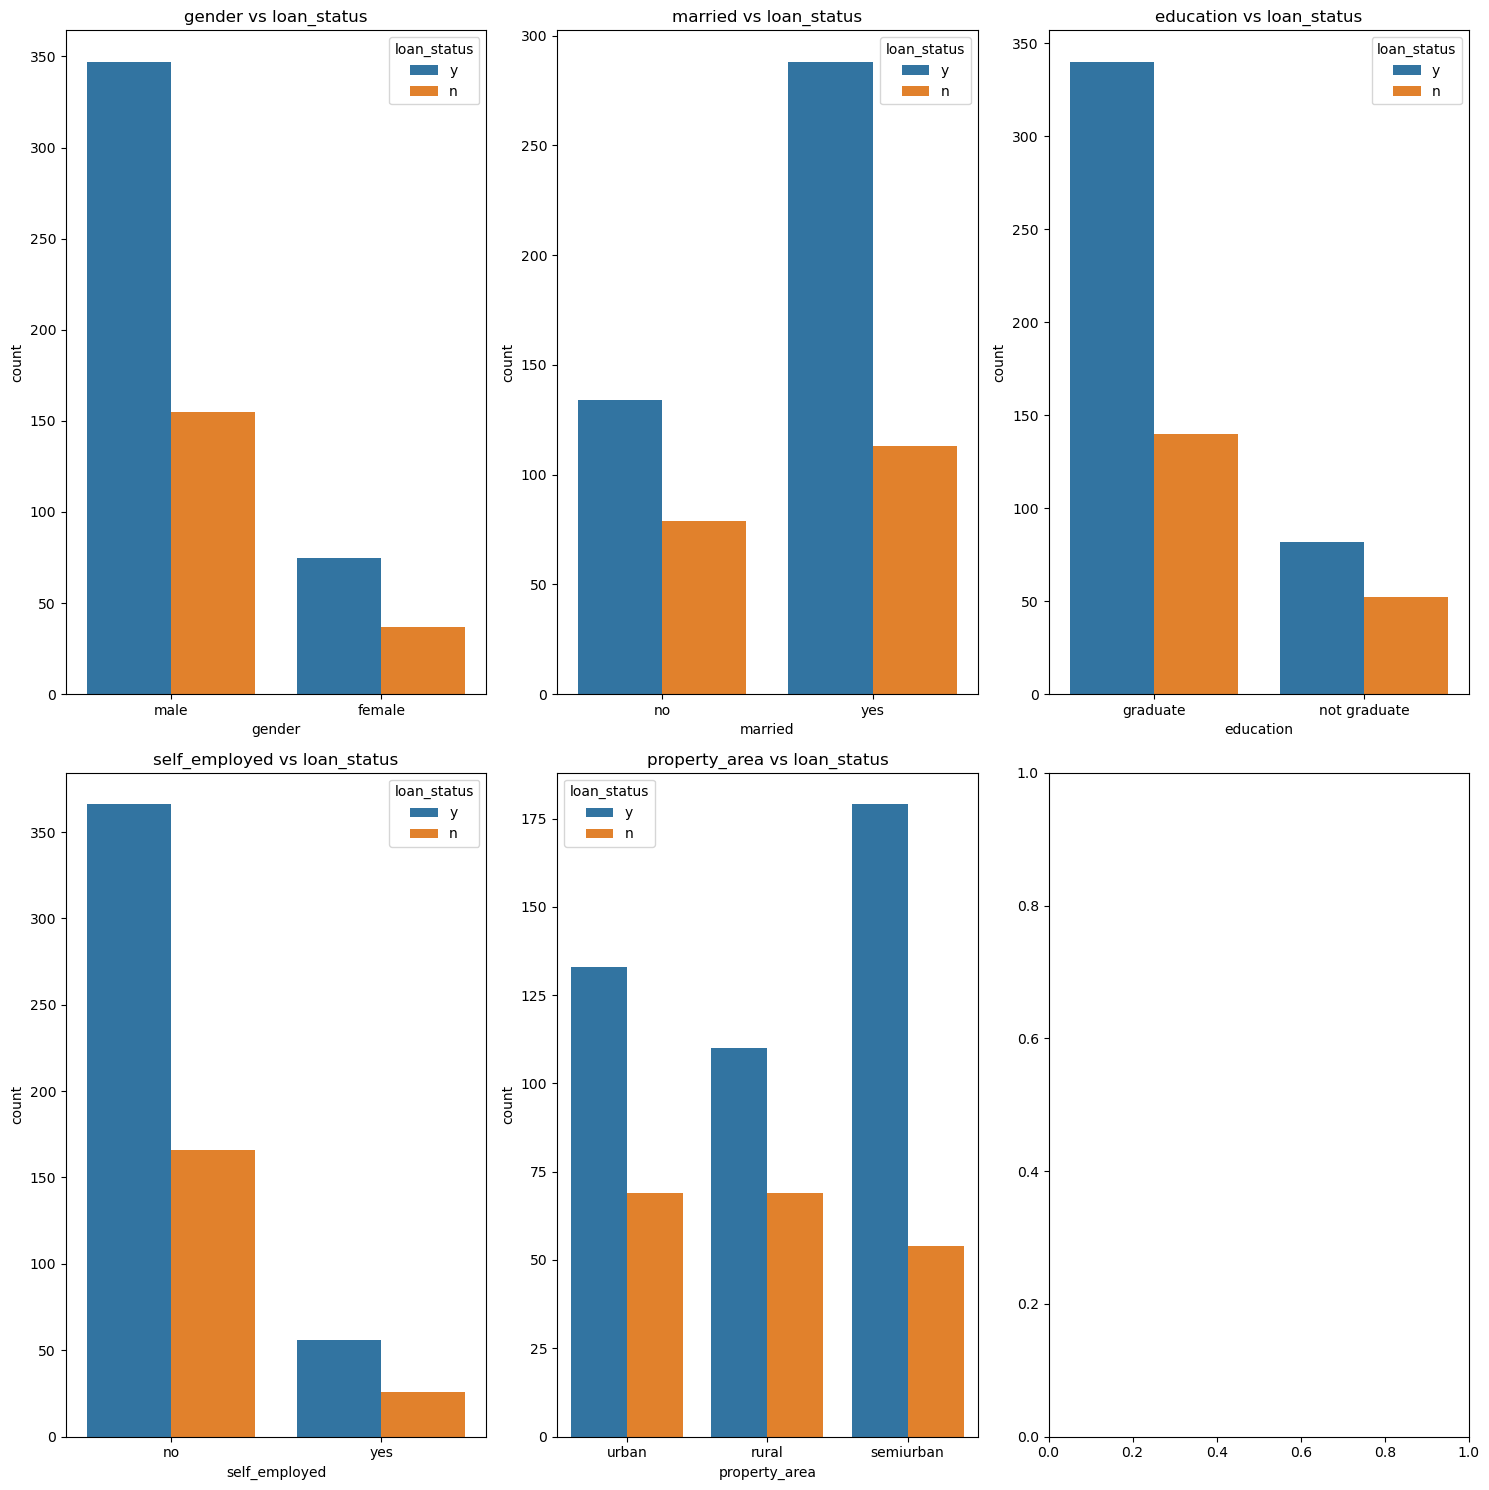

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
axes = axes.flatten()
cat_columns = ['gender','married','education','self_employed','property_area']
target_column = 'loan_status'

for i ,cat_column in enumerate(cat_columns):
    sns.countplot(x=cat_column, hue=target_column,data=df, ax = axes[i])
    axes[i].set_title(f'{cat_column} vs {target_column}')
    
plt.tight_layout()
plt.show()

- According to the above graphs we can say that more loans have given to the married male graduate peoples having property at semi-urban areas who have less dependents with high credit scores.

### 5. Encode the categorical data.

In [23]:
le = LabelEncoder()

In [24]:
categorical_cols = ['gender','married','education','self_employed','property_area','loan_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head(20)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.000000,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.000000,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.000000,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.000000,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.000000,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.000000,2,1
6,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.000000,2,1
7,1,1,3.0,0,0,3036,2504.0,158.0,360.0,0.000000,1,0
8,1,1,2.0,0,0,4006,1526.0,168.0,360.0,1.000000,2,1
9,1,1,1.0,0,0,12841,10968.0,349.0,360.0,1.000000,1,0


### 6. Separate the target and independent features and split the data into train and test.

In [25]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle. 

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.iloc[:,:])
X_test = scaler.fit_transform(X_test.iloc[:,:])

In [29]:
rfc = RandomForestClassifier()

rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [30]:
# checking accuracy
print("Accuracy is",rfc.score(X_test, Y_test)*100)

Accuracy is 75.67567567567568


In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
print('Accuracy is', dtree.score(X_test, Y_test)*100)

Accuracy is 72.97297297297297


- Random Forest Classifier model is giving more accuracy.

In [32]:
Y_pred = rfc.predict(X_test)

In [33]:
import pickle
# saving model to disk

pickle.dump(rfc, open('model.pkl','wb'))